In [1]:
pd.set_option("display.max_columns", 200)

In [2]:
df = pd.read_csv('high.csv')

In [3]:
df

,Glaze name,Cone,Color,Testing,Surface,Firing,Transparency,Recipe1,Recipe2,Recipe3,Recipe4,Recipe5,Recipe6,Recipe7,Recipe8,Recipe9,Recipe10,Recipe11,Recipe12,Recipe13
0,Blue lithium,010-09,Blue,NaN,Semi-gloss,Ox. or Red.,Opaque,Flint\t40.40,Soda spar\t20.20,Cryolite\t15.20,Lithium carbonate\t10.10,Bone ash\t8.10,Kaolin\t3.00,Copper oxide\t3.00,NaN,NaN,NaN,NaN,NaN,NaN
1,Yellow Lewis,10,NaN,NaN,Satin matt,Reduction,NaN,Feldspar\t35.00,Ball clay\t22.00,Flint\t5.00,Barium carbonate\t25.28,Opax\t15.00,Red iron oxide\t6.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Blue Limestone,10,NaN,NaN,Semi-gloss,Reduction,NaN,Kaolin\t9.50,Whiting\t19.00,Silica\t28.60,Feldspar\t38.10,Barium carbonate\t4.80,Rutile\t4.80,Copper carbonate\t1.60,Cobalt carbonate\t1.90,Bentonite\t2.00,NaN,NaN,NaN,NaN
3,Purple Chun,10,Red-purple,NaN,Gloss,Reduction,Opaque,Custer feldspar\t26.00,Flint\t29.50,Whiting\t15.10,EPK\t1.80,Ball clay\t5.60,Soda ash\t7.10,Frit 3134\t11.30,Barium carbonate\t4.00,Tin oxide\t1.10,Copper carbonate\t0.50,NaN,NaN,NaN
4,Matt Strontium Crystal Magic Steven Hill,10,White,NaN,Satin matt,Reduction,Opaque,Custer feldspar\t46.00,Whiting\t17.30,Tile 6 clay\t14.90,Strontium carbonate\t12.60,Frit 3124\t4.60,Lithium carbonate\t4.60,Titanium dioxide\t13.80,Bentonite\t2.00,NaN,NaN,NaN,NaN,NaN
5,#207.3,8,varies - see comments,NaN,Gloss,Oxidation,NaN,Nepheline syenite\t35.00,Dolomite\t15.00,Whiting\t8.00,Barium carbonate\t8.00,EPK\t4.00,Silica\t30.00,Bentonite\t3.00,NaN,NaN,NaN,NaN,NaN,NaN
6,Albany Glaze,9 - 10,NaN,NaN,NaN,NaN,NaN,Albany slip\t63.16,Cornwall Stone\t26.32,Whiting\t10.53,Red iron oxide\t5.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Albany Slip substitute Hendley's,7 - 10,brown black,NaN,glossy,ox. or red.,NaN,Redart\t72.00,Whiting\t10.00,Soda feldspar\t8.00,Talc\t5.00,EPK kaolin\t5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Alkaline High Fire 1,9-10,Clear,NaN,Gloss,Ox. or Red.,Transparent,Feldspar\t62.50,Whiting\t7.70,EPK\t5.10,Flint\t24.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Alkaline high fire 2,10,NaN,NaN,Gloss,Ox. or Red.,Transparent,Feldspar\t20.00,Cornwall Stone\t50.00,Whiting\t15.00,Flint\t15.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.Recipe12.value_counts()

Bentonite\t3.10           1
Bentonite\t3.12           1
Copper carbonate\t2.30    1
Name: Recipe12, dtype: int64

In [5]:
df.Recipe13.value_counts()

Series([], Name: Recipe13, dtype: int64)

# Color

In [6]:
df['Color'].value_counts()

White                                      75
Black                                      24
Clear                                      23
green                                      19
black                                      19
Blue                                       16
Amber                                      15
Green                                      14
Red                                        13
Tan                                        13
white                                      12
Brown                                      11
orange                                     10
Orange                                      9
Yellow                                      9
blue                                        9
iron red brown                              9
clear                                       6
rutile blue                                 6
yellow                                      5
Plum to black                               5
copper red                        

In [7]:
df['Color'] = df['Color'].str.lower()
tmp = []
threshold = df.shape[0]/100
for i in range(df['Color'].nunique()):
    if df['Color'].value_counts(sort=False)[i] < threshold:
        tmp.append(df['Color'].value_counts(sort=False).index[i])
len(tmp)

185

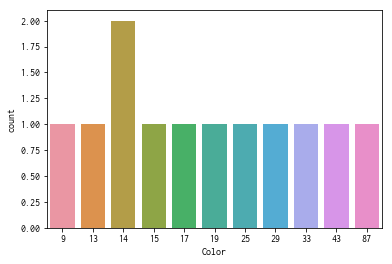

In [8]:
df['Color'].replace(tmp, np.NaN, inplace=True)
sns.countplot(df['Color'].value_counts())

In [9]:
df['Color'].value_counts()

white             87
black             43
green             33
clear             29
blue              25
orange            19
red               17
amber             15
tan               14
yellow            14
brown             13
iron red brown     9
Name: Color, dtype: int64

when we want to predict color

In [10]:
import math
for ix in range(len(df)):
    if type(df['Color'][ix]) == float:
        df.drop(index=ix, inplace=True)

In [11]:
df.reset_index(drop=True, inplace=True)

In [12]:
df

,Glaze name,Cone,Color,Testing,Surface,Firing,Transparency,Recipe1,Recipe2,Recipe3,Recipe4,Recipe5,Recipe6,Recipe7,Recipe8,Recipe9,Recipe10,Recipe11,Recipe12,Recipe13
0,Blue lithium,010-09,blue,NaN,Semi-gloss,Ox. or Red.,Opaque,Flint\t40.40,Soda spar\t20.20,Cryolite\t15.20,Lithium carbonate\t10.10,Bone ash\t8.10,Kaolin\t3.00,Copper oxide\t3.00,NaN,NaN,NaN,NaN,NaN,NaN
1,Matt Strontium Crystal Magic Steven Hill,10,white,NaN,Satin matt,Reduction,Opaque,Custer feldspar\t46.00,Whiting\t17.30,Tile 6 clay\t14.90,Strontium carbonate\t12.60,Frit 3124\t4.60,Lithium carbonate\t4.60,Titanium dioxide\t13.80,Bentonite\t2.00,NaN,NaN,NaN,NaN,NaN
2,Alkaline High Fire 1,9-10,clear,NaN,Gloss,Ox. or Red.,Transparent,Feldspar\t62.50,Whiting\t7.70,EPK\t5.10,Flint\t24.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alkaline Lee Rexrode,9,white,NaN,Satin matt,Oxidation,Semi-opaque,Barium carbonate\t36.60,Lithium carbonate\t1.10,Nepheline syenite\t45.60,Ball clay\t7.20,Flint\t9.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alkaline Lee Rexrode Sr,9,white,NaN,Satin matt,Oxidation,Translucent,Strontium carbonate\t27.50,Lithium carbonate\t1.10,Nepheline syenite\t45.60,Ball clay\t7.20,Flint\t9.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Amber Barnard,10,amber,NaN,Gloss,Reduction,Transparent,Barnard clay\t33.00,Wollastonite\t13.00,Whiting\t15.00,Custer feldspar\t20.00,Gerstley borate\t3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Amber Celadon McKenzie Smith,9-10,amber,NaN,Gloss,Reduction,Transparent,Wood ash\t22.00,Whiting\t17.00,Custer feldspar\t41.00,Ball clay\t4.00,Flint\t17.00,Red iron oxide\t8.00,Bentonite\t2.00,NaN,NaN,NaN,NaN,NaN,NaN
7,Amber Celadon Nick's Ochre,10,amber,NaN,Gloss,Reduction,Transparent,Custer feldspar\t26.50,Whiting\t22.20,Flint\t25.60,Ball clay\t25.60,Yellow ochre\t8.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Amber Celadon VC no albany,10,amber,NaN,Gloss,Reduction,Translucent,Custer feldspar\t19.00,Gerstley borate\t3.00,Dolomite\t2.00,Wollastonite\t9.00,Whiting\t14.00,Redart\t29.00,Barnard clay\t10.00,EPK\t2.00,Flint\t10.00,Red iron oxide\t2.00,NaN,NaN,NaN
9,Amber Gulden's,10,amber,NaN,Gloss,Reduction,Translucent,Custer feldspar\t30.00,Whiting\t25.00,Flint\t25.00,Kentucky OM #4\t10.00,Gerstley borate\t3.00,Bentonite\t2.00,Yellow iron oxide\t7.00,NaN,NaN,NaN,NaN,NaN,NaN


# Glaze name

In [13]:
df['Glaze name'] = df['Glaze name'].str.lower()
df['Glaze name'].value_counts()

white cornwall                                2
satin rick haynes                             2
clay casting porcelain slip michael corney    2
black hendley's rhodes                        2
slip black                                    2
clay  stoneware white vc                      1
crawl white                                   1
yellow lewis rr rev                           1
copper red 3                                  1
copper red 2                                  1
clear donna's                                 1
moonglow                                      1
black loretta                                 1
green rob's                                   1
slip flashing silverman's                     1
black matte                                   1
johnston nuka                                 1
slip wood's black                             1
celadon blue green v&o                        1
iron - blue water                             1
slip troy's flashing research no borax 2

In [14]:
df.drop('Glaze name', axis=1, inplace=True)

# Cone

In [15]:
df['Cone'] = df['Cone'].str.lower()
df['Cone'].replace(['10 - 12', '10-12'], '11', inplace=True)
df['Cone'].replace(['10 - 11', '10-11'], '10.5', inplace=True)
df['Cone'].replace(['9 - 11', '9-11', '9 - 10 - 11', '10?'], '10', inplace=True)
df['Cone'].replace(['9 - 10', '9-10', '010-09', '9-=10'], '9.5', inplace=True)
df['Cone'].replace(['8 - 10', '8-10', '8 - 9 - 10', '8 - 9 - 10', '9 only'], '9', inplace=True)
df['Cone'].replace('8 - 9', '8.5', inplace=True)
df['Cone'].replace('7 - 9', '8', inplace=True)
df['Cone'].replace(['7 - 8', '7-8'], '7.5', inplace=True)
df['Cone'].replace(['6 - 10', '6-10', '7 - 10', '9 - 12', '6 - 9', '5-9', '04 - 12', '5 - 10', '5-10', '6, 7, 8, 9, 10'], np.NaN, inplace=True)
df['Cone'].value_counts()

10      155
9.5      84
9        56
10.5      7
8         5
11        2
7         1
Name: Cone, dtype: int64

In [16]:
df = pd.concat([df, pd.get_dummies(df['Cone'], prefix='Cone_', dummy_na=True)], axis=1)
df = df.drop('Cone', axis=1)

# Testing

In [17]:
df['Testing'] = df['Testing'].str.lower()
df['Testing'].value_counts()

untested    70
tested      21
Name: Testing, dtype: int64

In [18]:
df.drop('Testing', axis=1, inplace=True)

# Surface

In [19]:
df['Surface'].value_counts()

Gloss                  71
Satin matt             41
unglazed               23
Semi-gloss             13
Waxy                   12
Matt                   10
glossy                  7
matte                   7
shiny glossy            6
Unglazed                5
satin matte             4
glossy shiny            4
?                       4
gloss                   4
Glossy                  4
Bright Glossy           3
satin to gloss          3
shiny, glossy           2
satin                   2
slip                    2
matt                    2
Crawl                   2
slip or engobe          2
Shiny or Glossy         2
Satin-Matt              2
Lichen                  2
semi-matte              2
Matt Stony              1
glossy, shiny           1
macro crystalline       1
Satin Matte             1
semi-matt               1
dry matte               1
fat waxy satin matt     1
Satin                   1
satin matt              1
Metallic                1
Sensuous Satin matt     1
Matte       

In [20]:
df['Surface'] = df['Surface'].str.lower()
tmp = []
threshold = df.shape[0]/100
for i in range(df['Surface'].nunique()):
    if df['Surface'].value_counts(sort=False)[i] < threshold:
        tmp.append(df['Surface'].value_counts(sort=False).index[i])
len(tmp)

19

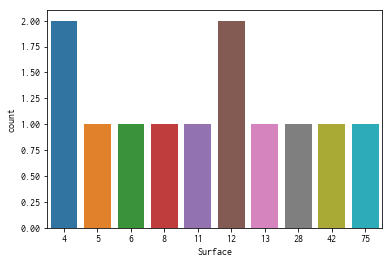

In [21]:
df['Surface'].replace(tmp, np.NaN, inplace=True)
sns.countplot(df['Surface'].value_counts())

In [22]:
df['Surface'].value_counts()

gloss           75
satin matt      42
unglazed        28
semi-gloss      13
matt            12
waxy            12
glossy          11
matte            8
shiny glossy     6
satin matte      5
glossy shiny     4
?                4
Name: Surface, dtype: int64

In [23]:
df['Surface'].replace('?', np.NAN, inplace=True)
df['Surface'].replace('gloss', 'glossy', inplace=True)
df['Surface'].replace('matt', 'matte', inplace=True)
df['Surface'].replace('satin matt', 'satin matte', inplace=True)
df['Surface'].replace(['shiny or glossy', 'shiny glossy', 'glossy, shiny', 'shiny, glossy'], 'glossy shiny', inplace=True)

In [24]:
df['Surface'].value_counts()

glossy          86
satin matte     47
unglazed        28
matte           20
semi-gloss      13
waxy            12
glossy shiny    10
Name: Surface, dtype: int64

In [25]:
df = pd.concat([df, pd.get_dummies(df['Surface'], prefix='Surface_', dummy_na=True)], axis=1)
df = df.drop('Surface', axis=1)

# Firing

In [26]:
df['Firing'] = df['Firing'].str.lower()
df['Firing'].value_counts()

reduction              139
ox. or red.            104
oxidation               15
salt - soda             11
ox or red                5
wood                     4
soda                     4
ox. or red. or soda      2
salt                     1
Name: Firing, dtype: int64

In [27]:
df['Firing'].replace('ox or red', 'ox. or red.', inplace=True)
df['Firing'].replace(['salt', 'soda'], 'salt - soda', inplace=True)
df['Firing'].replace('reduction o', 'reduction', inplace=True)

In [28]:
df['Firing'].value_counts()

reduction              139
ox. or red.            109
salt - soda             16
oxidation               15
wood                     4
ox. or red. or soda      2
Name: Firing, dtype: int64

In [29]:
df['Firing'] = df['Firing'].str.lower()
tmp = []
threshold = df.shape[0]/100
for i in range(df['Firing'].nunique()):
    if df['Firing'].value_counts(sort=False)[i] < threshold:
        tmp.append(df['Firing'].value_counts(sort=False).index[i])
len(tmp)

1

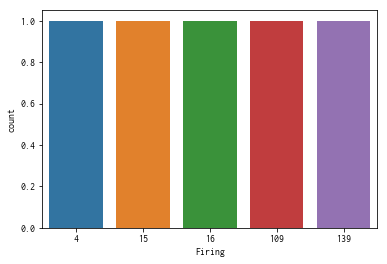

In [30]:
df['Firing'].replace(tmp, np.NaN, inplace=True)
sns.countplot(df['Firing'].value_counts())

In [31]:
df['Firing'].value_counts()

reduction      139
ox. or red.    109
salt - soda     16
oxidation       15
wood             4
Name: Firing, dtype: int64

In [32]:
df = pd.concat([df, pd.get_dummies(df['Firing'], prefix='Firing_', dummy_na=True)], axis=1)
df = df.drop('Firing', axis=1)

# Transparency

In [33]:
df['Transparency'] = df['Transparency'].str.lower()
df['Transparency'].value_counts()

opaque         127
transparent     42
semi-opaque     32
translucent     30
Name: Transparency, dtype: int64

In [34]:
df['Transparency'].replace('translucent', 'semi-opaque', inplace=True)

In [35]:
df['Transparency'].value_counts()

opaque         127
semi-opaque     62
transparent     42
Name: Transparency, dtype: int64

In [36]:
df = pd.concat([df, pd.get_dummies(df['Transparency'], prefix='Transparency_', dummy_na=True)], axis=1)
df = df.drop('Transparency', axis=1)

# Recipe

In [37]:
recipe = []

In [38]:
ingredients = []
for col in df.columns:
    if col.startswith('Recipe'):
        for ix in range(df.shape[0]):
            ingredients.append(str(df[col][ix]).split('\t'))
#            if str(df[col][ix]).split('\t')[0] != 'nan':
#                ingredients.append(str(df[col][ix]).split('\t'))
df_ingredients = pd.DataFrame(ingredients)
df_ingredients.columns = ['ingredient', 'amount']

In [39]:
df_ingredients

,ingredient,amount
0,Flint,40.40
1,Custer feldspar,46.00
2,Feldspar,62.50
3,Barium carbonate,36.60
4,Strontium carbonate,27.50
5,Barnard clay,33.00
6,Wood ash,22.00
7,Custer feldspar,26.50
8,Custer feldspar,19.00
9,Custer feldspar,30.00


In [40]:
df_ingredients['ingredient'] = df_ingredients['ingredient'].str.lower()
df_ingredients['ingredient'].unique()
len(df_ingredients['ingredient'].unique())

171

In [41]:
for ingredient in df_ingredients['ingredient'].unique():
    df[ingredient] = 0.

In [42]:
for iing in range(int(len(df_ingredients)/len(df))):
    for ix in range(len(df)):
        ingredient = df_ingredients['ingredient'][len(df)*iing + ix]
        amount = df_ingredients['amount'][len(df)*iing + ix]
        df[ingredient][ix] = amount

/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [43]:
for col in df.columns:
    if col.startswith('Recipe'):
        df.drop(str(col), axis=1, inplace=True)

In [44]:
df

,Color,Cone__10,Cone__10.5,Cone__11,Cone__7,Cone__8,Cone__9,Cone__9.5,Cone__nan,Surface__glossy,Surface__glossy shiny,Surface__matte,Surface__satin matte,Surface__semi-gloss,Surface__unglazed,Surface__waxy,Surface__nan,Firing__ox. or red.,Firing__oxidation,Firing__reduction,Firing__salt - soda,Firing__wood,Firing__nan,Transparency__opaque,Transparency__semi-opaque,Transparency__transparent,Transparency__nan,flint,custer feldspar,feldspar,barium carbonate,strontium carbonate,barnard clay,wood ash,feldspar - theoretical,albany slip,alberta slip,epk,nepheline syenite,hardwood ash,custer spar,mixed hardwood ash,kentucky om #4,avery kaolin,frit 3110,kona f-4 feldspar,cornwall stone,dolomite,g-200 feldspar,minspar soda feldspar,talc,g-200 spar,potash feldspar,kona f-4 spar,whiting,k-200 feldspar,kaolin,silica,tile 6 clay,goldart,grolleg,a.p. green,foundry hill creme,#6 tile clay,xx sagger,hawthorne bond,kona feldspar,kingman feldspar,soda feldspar,ferro frit 3269,zinc oxide,potash feldspar - theoretical,ferro frit 3110,red clay,bone ash,neph sy,gillespie borate,soda ash,"grog,150 mesh",gerstley borate,kaolin - theoretical,redart,feldspar fff,potash spar,g22,frit 3134,plastic vitrox,kona f-4 spar,f-4 feldspar,nc-4 feldspar,soda spar,lithium carbonate,wollastonite,softwood ash,ball clay,albany slip clay,colemanite,om-4 ball clay,velva cast,c & c,kaolin georgia,tennessee ball clay,fire clay,kentucky ball clay,china clay,magnesium carbonate,spodumene,salt,calcined kaolin,newman red,mason 6600 black stain,borax,f-4 spar,cryolite,tennessee #10,cobalt oxide,"cobalt oxide, black",cobalt carbonate,tennessee #1,lincoln,nan,copper carbonate,amblygonite,xx sagger clay,zircopax,manganese dioxide,calcium carbonate,tin oxide,rutile,tennessee #5 ball clay,epk kaolin,red iron oxide,petalite,grolleg kaolin,georgia kaolin,pine lake,darvan,pyrotrol,bentonite,alumina,pyrophyllite,flint (silica),frit 3195,kona f-4 soda feldspar,rice hull ash,quartz,talc theoretical,nsd,zircopax plus,titanium dioxide,frit 3185,black stain,talc (milled white),superpax,frit 3124,yellow ochre,chrome oxide,iron oxide,barnard slip,grog,epsom salts,macaloid,pyrax,kaopaque,tin,clay,rhyolite,black iron oxide,manganese carbonate,frit p-25,ash wood,ochre,redart clay,sodium silicate,"grog, fine",molochite,kyanite,iron chromate,alumina hydrate,ultrox,copper oxide,yellow iron oxide,green chrome oxide,rutile (powdered),black nickel oxide,nickel oxide,mullite,talc (ny),ky white glaze clay,cmc,chromium oxide,glomax,ferro frit 3134,black mason stain,rutile (granular),cerdec intensive red stain,granular ilmenite,ferric oxide
0,blue,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,40.40,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,3.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,8.1,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,20.2,10.1,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.2,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,white,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0.00,46.00,0.00,0.00,12.60,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,17.30,0.0,0.00,0.00,14.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,4.6,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.8,0.0,0.0,0.00,0.0,4.6,0.0,0.0,0.0,0

In [45]:
df_ingredients['ingredient'].str.lower().value_counts()

nan                       2091
whiting                    194
flint                      142
epk                        129
custer feldspar            119
silica                      79
dolomite                    77
red iron oxide              76
nepheline syenite           68
ball clay                   62
bentonite                   61
barium carbonate            43
talc                        42
kentucky om #4              35
kaolin                      33
zinc oxide                  33
kona f-4 feldspar           32
cobalt carbonate            31
copper carbonate            31
gerstley borate             31
tin oxide                   29
grolleg                     28
manganese dioxide           26
rutile                      25
potash feldspar             24
cobalt oxide                23
strontium carbonate         21
zircopax                    21
bone ash                    20
chrome oxide                20
                          ... 
nsd                          1
softwood

In [46]:
tmp = []
threshold = df.shape[0]/100
for i in range(df_ingredients['ingredient'].nunique()):
    if df_ingredients['ingredient'].value_counts(sort=False)[i] < threshold:
        tmp.append(df_ingredients['ingredient'].value_counts(sort=False).index[i])
len(tmp)

101

In [47]:
tmp.sort()

In [48]:
tmp

['#6 tile clay',
 'albany slip clay',
 'alumina',
 'alumina hydrate',
 'amblygonite',
 'ash wood',
 'barnard slip',
 'black mason stain',
 'black nickel oxide',
 'black stain',
 'c & c',
 'calcium carbonate',
 'cerdec intensive red stain',
 'china clay',
 'chromium oxide',
 'clay',
 'cmc',
 'cobalt oxide, black',
 'copper oxide',
 'cryolite',
 'darvan',
 'epk kaolin',
 'epsom salts',
 'f-4 spar',
 'feldspar - theoretical',
 'feldspar fff',
 'ferric oxide',
 'ferro frit 3110',
 'ferro frit 3134',
 'ferro frit 3269',
 'fire clay',
 'flint (silica)',
 'foundry hill creme',
 'frit 3124',
 'frit 3185',
 'frit 3195',
 'frit p-25',
 'g-200 spar',
 'g22',
 'georgia kaolin',
 'gillespie borate',
 'glomax',
 'granular ilmenite',
 'green chrome oxide',
 'grog, fine',
 'grog,150 mesh',
 'grolleg kaolin',
 'hardwood ash',
 'hawthorne bond',
 'iron chromate',
 'kaolin georgia',
 'kaopaque',
 'kentucky ball clay',
 'kingman feldspar',
 'kona f-4  spar',
 'kona f-4 soda feldspar',
 'kona f-4 spar',
 '

# modeling

In [49]:
df

,Color,Cone__10,Cone__10.5,Cone__11,Cone__7,Cone__8,Cone__9,Cone__9.5,Cone__nan,Surface__glossy,Surface__glossy shiny,Surface__matte,Surface__satin matte,Surface__semi-gloss,Surface__unglazed,Surface__waxy,Surface__nan,Firing__ox. or red.,Firing__oxidation,Firing__reduction,Firing__salt - soda,Firing__wood,Firing__nan,Transparency__opaque,Transparency__semi-opaque,Transparency__transparent,Transparency__nan,flint,custer feldspar,feldspar,barium carbonate,strontium carbonate,barnard clay,wood ash,feldspar - theoretical,albany slip,alberta slip,epk,nepheline syenite,hardwood ash,custer spar,mixed hardwood ash,kentucky om #4,avery kaolin,frit 3110,kona f-4 feldspar,cornwall stone,dolomite,g-200 feldspar,minspar soda feldspar,talc,g-200 spar,potash feldspar,kona f-4 spar,whiting,k-200 feldspar,kaolin,silica,tile 6 clay,goldart,grolleg,a.p. green,foundry hill creme,#6 tile clay,xx sagger,hawthorne bond,kona feldspar,kingman feldspar,soda feldspar,ferro frit 3269,zinc oxide,potash feldspar - theoretical,ferro frit 3110,red clay,bone ash,neph sy,gillespie borate,soda ash,"grog,150 mesh",gerstley borate,kaolin - theoretical,redart,feldspar fff,potash spar,g22,frit 3134,plastic vitrox,kona f-4 spar,f-4 feldspar,nc-4 feldspar,soda spar,lithium carbonate,wollastonite,softwood ash,ball clay,albany slip clay,colemanite,om-4 ball clay,velva cast,c & c,kaolin georgia,tennessee ball clay,fire clay,kentucky ball clay,china clay,magnesium carbonate,spodumene,salt,calcined kaolin,newman red,mason 6600 black stain,borax,f-4 spar,cryolite,tennessee #10,cobalt oxide,"cobalt oxide, black",cobalt carbonate,tennessee #1,lincoln,nan,copper carbonate,amblygonite,xx sagger clay,zircopax,manganese dioxide,calcium carbonate,tin oxide,rutile,tennessee #5 ball clay,epk kaolin,red iron oxide,petalite,grolleg kaolin,georgia kaolin,pine lake,darvan,pyrotrol,bentonite,alumina,pyrophyllite,flint (silica),frit 3195,kona f-4 soda feldspar,rice hull ash,quartz,talc theoretical,nsd,zircopax plus,titanium dioxide,frit 3185,black stain,talc (milled white),superpax,frit 3124,yellow ochre,chrome oxide,iron oxide,barnard slip,grog,epsom salts,macaloid,pyrax,kaopaque,tin,clay,rhyolite,black iron oxide,manganese carbonate,frit p-25,ash wood,ochre,redart clay,sodium silicate,"grog, fine",molochite,kyanite,iron chromate,alumina hydrate,ultrox,copper oxide,yellow iron oxide,green chrome oxide,rutile (powdered),black nickel oxide,nickel oxide,mullite,talc (ny),ky white glaze clay,cmc,chromium oxide,glomax,ferro frit 3134,black mason stain,rutile (granular),cerdec intensive red stain,granular ilmenite,ferric oxide
0,blue,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,40.40,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,3.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,8.1,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,20.2,10.1,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.2,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,white,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0.00,46.00,0.00,0.00,12.60,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,17.30,0.0,0.00,0.00,14.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,4.6,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.8,0.0,0.0,0.00,0.0,4.6,0.0,0.0,0.0,0

In [50]:
X = df.drop('Color', axis=1)
y = df['Color']

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [52]:
import lightgbm
#from sklearn.linear_model import LogisticRegression

clf = lightgbm.LGBMClassifier()
#clf = LogisticRegression()

clf.fit(X_train, y_train)
predict = clf.predict(X_test)

/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [53]:
df_check = pd.DataFrame(predict, np.array(y_test))
df_check

,0
blue,clear
clear,clear
green,white
black,white
amber,white
clear,clear
green,amber
green,clear
black,black
white,white


In [54]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5)

/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-pac

In [55]:
scores

array([0.49253731, 0.55223881, 0.53846154, 0.53225806, 0.61403509])

In [56]:
feature_importance = pd.DataFrame(clf.feature_importances_, index=X.columns, columns=['feature_importance'])
feature_importance.sort_values(by=['feature_importance'], ascending=False)

,feature_importance
whiting,1608
flint,846
epk,784
custer feldspar,706
red iron oxide,507
silica,458
Transparency__opaque,450
Firing__reduction,411
nepheline syenite,373
Firing__ox. or red.,363


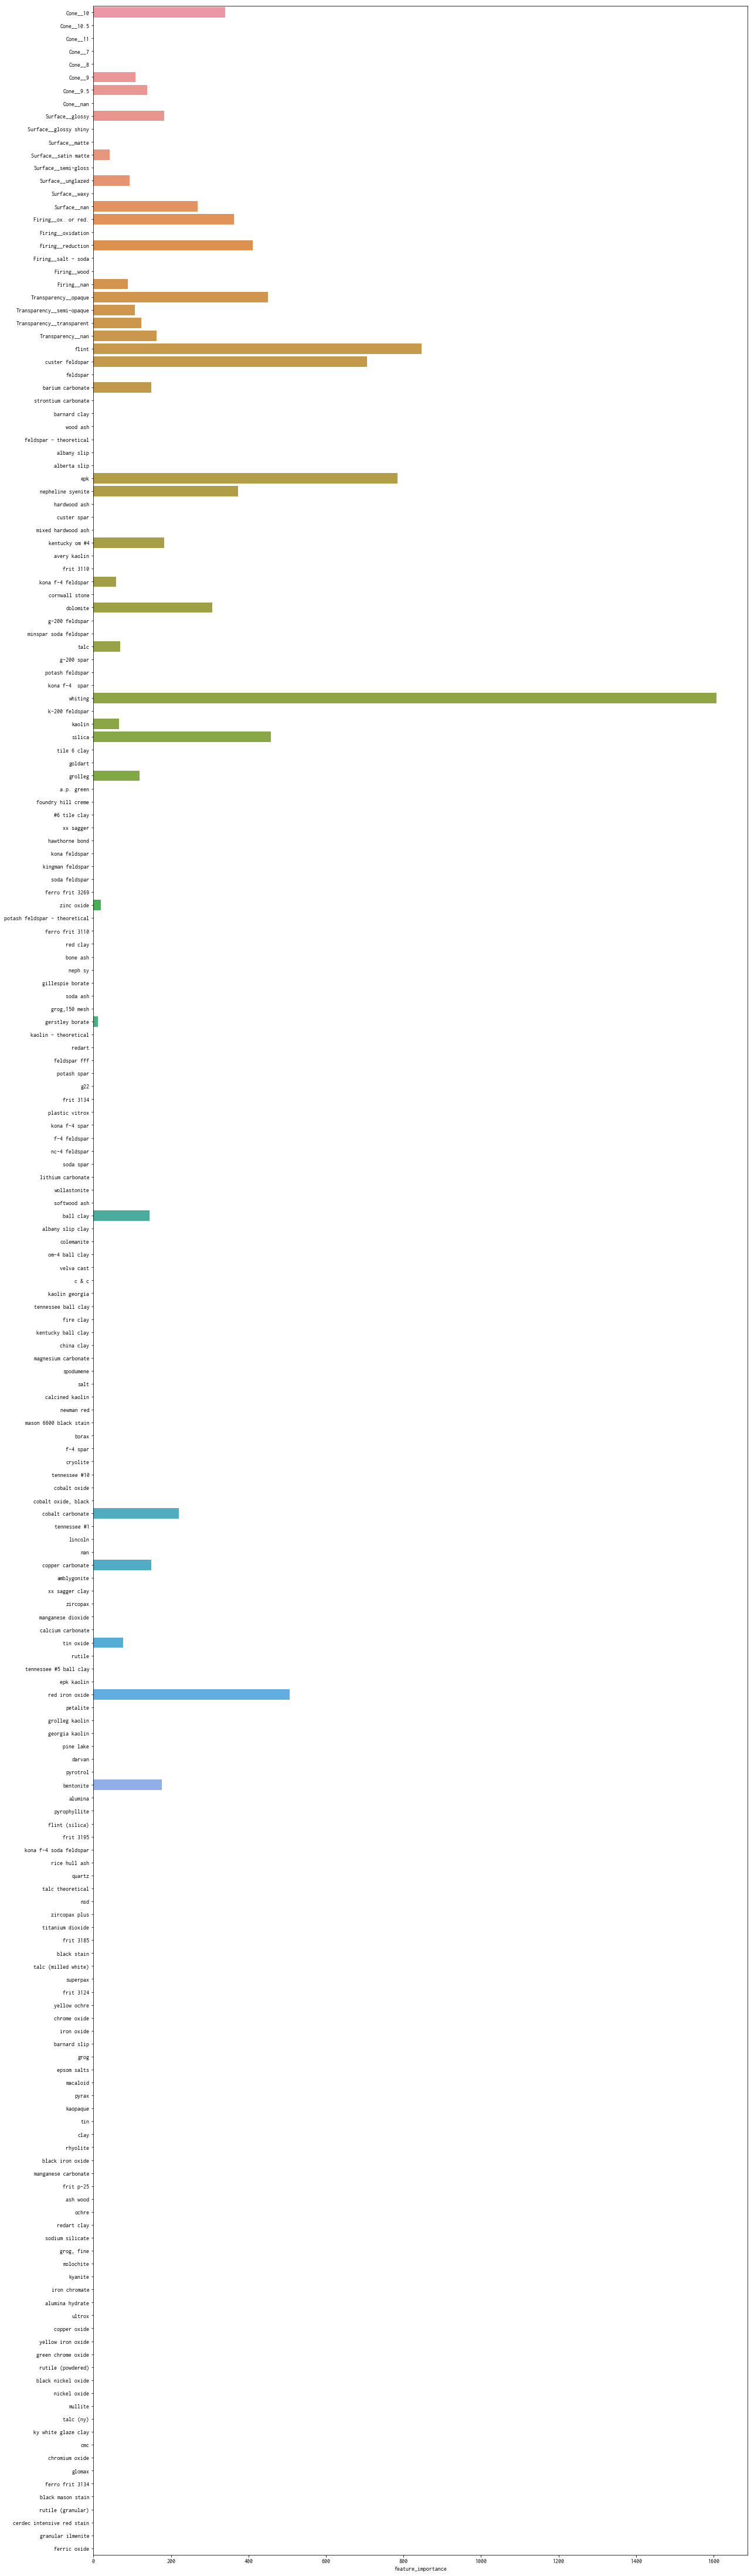

In [57]:
plt.figure(figsize=(20, 80))
sns.barplot(x=feature_importance['feature_importance'], y=feature_importance.index)